In [1]:
#imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract

In [5]:
def show_image(img,gray=0):    
    if gray == 1:
        plt.imshow(img, cmap='gray')        
    else:
        plt.imshow(img)    
    plt.show()

In [3]:
def color_gradient_combo_pipeline(img, s_thresh=(100, 255), sx_thresh=(20, 100)):    
    # Convert to HLS color space and separate the S and L channel
   # hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = img
    s_channel = img
    
    # Apply sobel on L channel
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    sobely = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobely = np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
    
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobelx)
    sxbinary[(scaled_sobelx >= sx_thresh[0]) & (scaled_sobelx <= sx_thresh[1])] = 1
    
    # Threshold y gradient
    sybinary = np.zeros_like(scaled_sobely)
    sybinary[(scaled_sobely >= sx_thresh[0]) & (scaled_sobely <= sx_thresh[1])] = 1
    
    # Apply a threshold on S color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1    
    return s_binary,sxbinary, sybinary
    #combine Gradient threshold and Color threshold
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    color_binary = 255 * np.dstack((combined_binary, combined_binary, combined_binary)).astype('uint8')
    return color_binary, combined_binary


In [4]:
file = "1.jpg"
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
print(pytesseract.image_to_string(Image.open(file)))

output_file_name:  C:\Users\tac\AppData\Local\Temp\tess_aa415key.txt  input_file_name:  C:\Users\tac\AppData\Local\Temp\tess_vnrzkdyj.bmp
Command:  ['pytesseract.exe', 'C:\\Users\\tac\\AppData\\Local\\Temp\\tess_vnrzkdyj.bmp', 'C:\\Users\\tac\\AppData\\Local\\Temp\\tess_aa415key']
error:  b'Usage: python tesseract.py [-l language] input_file\r\n'


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\tac\\AppData\\Local\\Temp\\tess_aa415key.txt'

In [ ]:
file = "1.jpg"
img = cv2.imread('./Images/'+file) #opencv opens images in BGR format
img = cv2.resize(img,(256,368))
img2 = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to standard RGB    
print(img.shape)
show_image(img,1)
#plt.imshow(img, cmap='gray')




In [ ]:
img1 = img.copy();
show_image(img1,1)
print()
#ret,thresh = cv2.threshold(img1,100,0,0)
bImg = np.ones_like(img)

bImg[img > 90] = 0
show_image(bImg,1)
print()

print(bImg.shape)

im2, contours, hierarchy = cv2.findContours(bImg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    print(cv2.contourArea(cnt))
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)

        if  h>28:
            cv2.rectangle(img2,(x,y),(x+w,y+h),(0,0,255),2)
            print("drawing rec")
            
show_image(img2)
'''cv2.drawContours(img2, contours, -1, (0,255,0), 3)
show_image(img2,1)'''

In [ ]:
plt.show()
print(len(contours))

In [ ]:
bImg = np.zeros_like(img)

bImg[img > 90] = 1
show_image(bImg,1)

In [ ]:
file = "2.jpg"
img = cv2.imread('./Images/'+file) #opencv opens images in BGR format
img = cv2.resize(img,(256,368))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to standard RGB    
print(img.shape)
show_image(img,1)
#plt.imshow(img, cmap='gray')

In [ ]:
bImg = np.zeros_like(img)

bImg[img > 100] = 1
show_image(bImg,1)

In [ ]:
im = cv2.imread("./Images/1.jpg")
print(im.shape)
show_image(im)

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)
print(im_th.shape,im_gray.shape)
_,ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

show_image(im_th,1)

rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
show_image(im)

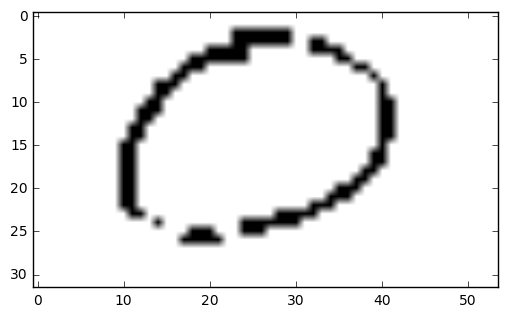

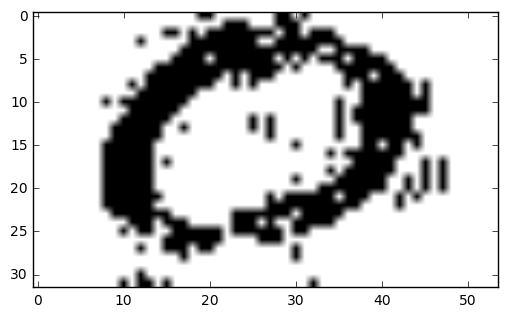

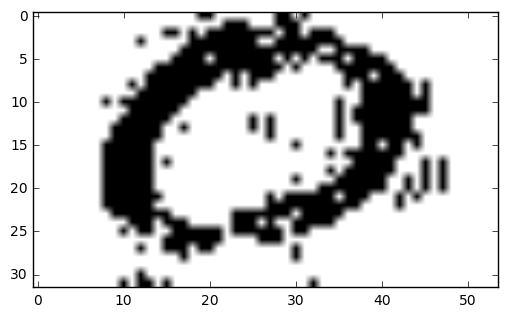

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1

In [4]:
im = cv2.imread("./Images/3.jpg")
#show_image(im)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imgBinary,sxBinary,syBinary = color_gradient_combo_pipeline(im_gray,(120,255),(0,20))

show_image(imgBinary,1)
#print()
show_image(sxBinary,1)
#print()
show_image(syBinary,1)
for row in sxBinary:
    for col in row:
        print(col,end=' ')
    print()

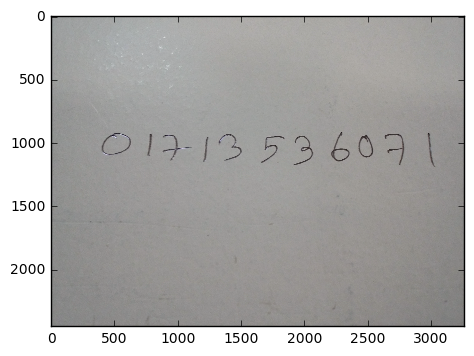

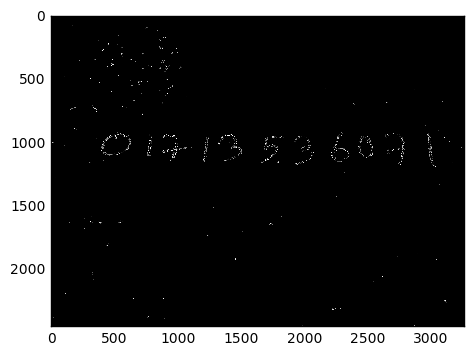

In [11]:
im = cv2.imread("./Images/1.jpg")
show_image(im)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
kernel_size = 3
blur_gray = cv2.GaussianBlur(im_gray,(kernel_size, kernel_size), 0)
edges = cv2.Canny(blur_gray, 20, 40)
show_image(edges,1)

(2448, 3264)


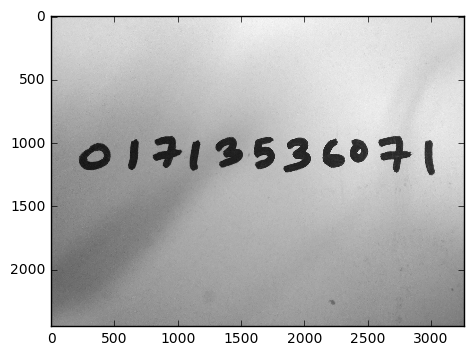

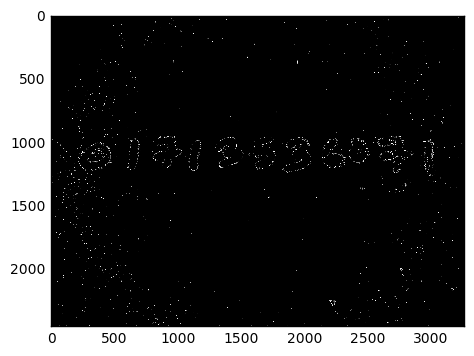

In [7]:
im = cv2.imread("./Images/2.jpg")

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
print(im_gray.shape)
show_image(im_gray,1)
kernel_size = 3
blur_gray = cv2.GaussianBlur(im_gray,(kernel_size, kernel_size), 0)
edges = cv2.Canny(blur_gray, 20, 40)
show_image(edges,1)

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pickle
from skimage.feature import hog
from sklearn.utils import shuffle

from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import ELU
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Lambda
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.regularizers import l2
from keras.models import model_from_json
import simplejson as json
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import random
import math

### Make data frame in Pandas

import pandas as pd

#Reading the first data set from crowd-ai
rootDir = "Handwitten/"
csvFile = pd.read_csv(rootDir+'DL Proj.csv', header=0)

dataFile = csvFile#[(csvFile['Label']!='Pedestrian')].reset_index()
dataFile['imagename'] = './' + rootDir + dataFile['imagename']

dataFile.head(10)
print('first data set len: ',len(dataFile))

train_samples_per_epoch = 10000
trainBatchSize = 16
imgRow = 720
imgCol = 1280
croppedImgRow = 720
croppedImgCol = 1280
smooth = 1.

def CropImage(image):
    #Crops the iamge so that the hood of the car and top of the image
    #which contains sky trees and other stuffs are removed.
    height = len(image)
    return image[int(height * 1/5.):int(height * 6/7.0), :, :]


def RandomBrightness(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(img)

    scale = random.uniform(1, 1.5)
    #print(scale)
    v = np.clip(v * scale, 0, 255, out=v)
    img = cv2.merge((h, s, v))
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    return img

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def TrainDataGenerator(dataInfoList,batchSize):
    batch_x, batch_y = [], []
    while True:
        dataInfo = dataInfoList[random.randint(0, 1)]
        row = np.random.randint(len(dataInfo))

        fileName = dataInfo['imagename'][row]
        img = cv2.imread(fileName)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        origShape = img.shape
        img = cv2.resize(img, (imgCol, imgRow))

        data = dataInfo[dataInfo['imagename'][row] == dataInfo['imagename']].reset_index()

        targetImg = np.reshape(np.zeros_like(img[:, :, 2]), (imgRow, imgCol, 1))
        for i in range(len(data)):
            targetImg[data.iloc[i]['bottomrighty']:data.iloc[i]['toplefty'], data.iloc[i]['topleftx']:data.iloc[i]['bottomrightx']] = 1

        targetImg = CropImage(targetImg)
        batch_x.append(img)
        batch_y.append(targetImg)

        if len(batch_x) == batchSize:
            x_array = np.asarray(batch_x)
            y_array = np.asarray(batch_y)
            yield (x_array, y_array)
            batch_x, batch_y = [], []


Using TensorFlow backend.


first data set len:  54


In [2]:
dataFile.head(10)

,imagename,digit,topleftx,toplefty,bottomrightx,bottomrighty
0,./Handwitten/1.jpg,1,70,23,144,126
1,./Handwitten/1.jpg,1,230,32,292,120
2,./Handwitten/1.jpg,1,380,19,463,118
3,./Handwitten/1.jpg,1,530,22,596,108
4,./Handwitten/1.jpg,1,680,22,743,113
5,./Handwitten/1.jpg,1,835,22,912,108
6,./Handwitten/1.jpg,1,966,23,1025,113
7,./Handwitten/1.jpg,1,1071,26,1132,117
8,./Handwitten/1.jpg,1,1157,24,1204,113
9,./Handwitten/1.jpg,2,61,147,129,239


23 126 144 70
32 120 292 230
19 118 463 380
22 108 596 530
22 113 743 680
22 108 912 835
23 113 1025 966
26 117 1132 1071
24 113 1204 1157
147 239 129 61
147 227 293 203
142 216 428 346
130 218 581 497
135 207 733 645
122 196 885 796
128 202 990 919
127 205 1111 1036
127 224 1213 1125
247 326 131 61
240 314 266 189
230 304 396 313
227 309 526 463
228 298 690 616
222 300 857 778
214 313 983 895
221 322 1077 1000
235 324 1198 1123
341 422 128 50
329 422 260 171
314 408 402 300
310 399 532 434
300 391 699 602
308 391 859 757
315 396 966 876
327 408 1085 987
335 406 1191 1117
433 516 135 48
429 520 258 169
422 510 403 302
415 496 517 438
412 505 683 577
413 500 833 734
406 502 953 854
411 503 1081 979
414 513 1195 1105
523 591 126 46
526 594 265 168
513 589 409 302
507 589 509 432
512 595 652 567
514 597 801 702
506 593 910 835
508 580 1042 973
499 592 1161 1074
(720, 1280, 3)


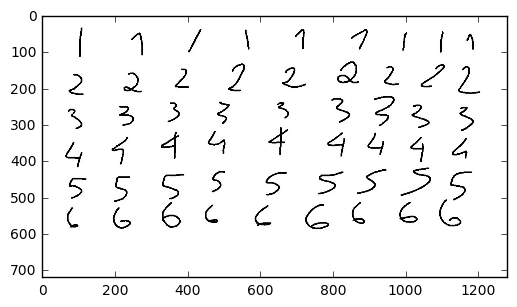

(720, 1280, 1)


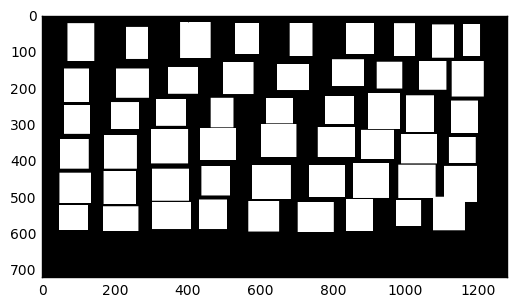

In [14]:
dataInfo = dataFile
row = np.random.randint(len(dataInfo))

fileName = dataInfo['imagename'][row]
img = cv2.imread(fileName)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
origShape = img.shape
img = cv2.resize(img, (imgCol, imgRow))

data = dataInfo[dataInfo['imagename'][row] == dataInfo['imagename']].reset_index()

targetImg = np.reshape(np.zeros_like(img[:, :, 2]), (imgRow, imgCol, 1))
for i in range(len(data)):
    targetImg[data.iloc[i]['toplefty']:data.iloc[i]['bottomrighty'], data.iloc[i]['topleftx']:data.iloc[i]['bottomrightx'],:] = 1
    print(data.iloc[i]['toplefty'],data.iloc[i]['bottomrighty'], data.iloc[i]['bottomrightx'],data.iloc[i]['topleftx'])
print(img.shape)
plt.imshow(img)
plt.show()
print(targetImg.shape)
img1 = cv2.resize(targetImg, (imgCol, imgRow))
plt.imshow(img1,cmap='gray')
plt.show()

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pickle
from skimage.feature import hog
from sklearn.utils import shuffle

from keras import backend as K
from keras.models import Sequential
from keras.models import Model
from keras.layers import ELU
from keras.layers import Input, merge, Convolution2D, MaxPooling2D, UpSampling2D, Lambda
from keras.optimizers import Adam
from keras.layers.pooling import MaxPooling2D
from keras.regularizers import l2
from keras.models import model_from_json
import simplejson as json
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import random
import math

### Make data frame in Pandas

import pandas as pd



Using TensorFlow backend.


In [2]:
#Reading the data set 
rootDir = "Handwitten/"
csvFile = pd.read_csv(rootDir+'DL Proj.csv', header=0)

dataFile = csvFile#[(csvFile['Label']!='Pedestrian')].reset_index()
dataFile['imagename'] = './' + rootDir + dataFile['imagename']

dataFile.head(10)
print('first data set len: ',len(dataFile))




first data set len:  54


In [15]:
train_samples_per_epoch = 60
trainBatchSize = 1
imgRow = 704
imgCol = 1280
croppedImgRow = imgRow
croppedImgCol = imgCol
smooth = 1.

def CropImage(image):
    #Crops the iamge so that the hood of the car and top of the image
    #which contains sky trees and other stuffs are removed.
    height = len(image)
    return image[int(height * 1/5.):int(height * 6/7.0), :, :]


def RandomBrightness(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(img)

    scale = random.uniform(1, 1.5)
    #print(scale)
    v = np.clip(v * scale, 0, 255, out=v)
    img = cv2.merge((h, s, v))
    img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    return img

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


In [16]:
def TrainDataGenerator(dataInfo,batchSize):
    batch_x, batch_y = [], []
    while True:

        row = np.random.randint(len(dataInfo))

        fileName = dataInfo['imagename'][row]
        img = cv2.imread(fileName)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        origShape = img.shape
        img = cv2.resize(img, (imgCol, imgRow))

        data = dataInfo[dataInfo['imagename'][row] == dataInfo['imagename']].reset_index()
        data['toplefty'] = np.round(data['toplefty'] / origShape[1] * imgCol)
        data['bottomrighty'] = np.round(data['bottomrighty'] / origShape[1] * imgCol)
        data['topleftx'] = np.round(data['topleftx'] / origShape[0] * imgRow)
        data['bottomrightx'] = np.round(data['bottomrightx'] / origShape[0] * imgRow)

        targetImg = np.reshape(np.zeros_like(img[:, :, 2]), (imgRow, imgCol, 1))
        for i in range(len(data)):
            targetImg[data.iloc[i]['toplefty']:data.iloc[i]['bottomrighty'],data.iloc[i]['topleftx']:data.iloc[i]['bottomrightx'], :] = 1

        batch_x.append(img)
        batch_y.append(targetImg)

        if len(batch_x) == batchSize:
            x_array = np.asarray(batch_x)
            y_array = np.asarray(batch_y)
            yield (x_array, y_array)
            batch_x, batch_y = [], []

In [17]:
def CreateModel():
    input_layer = Input((croppedImgRow, croppedImgCol, 3))
    conv0 = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(input_layer)
    conv0 = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(conv0)
    pool0 = MaxPooling2D(pool_size=(2, 2))(conv0)

    conv1 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(pool0)
    conv1 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(pool1)
    conv2 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(pool2)
    conv3 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(pool3)
    conv4 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    conv4_0 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(pool4)
    conv4_0 = Convolution2D(256, 3, 3, activation='relu', border_mode='same')(conv4_0)

    up5_0 = merge([UpSampling2D(size=(2, 2))(conv4_0), conv4], mode='concat', concat_axis=3)
    conv5_0 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(up5_0)
    conv5_0 = Convolution2D(128, 3, 3, activation='relu', border_mode='same')(conv5_0)

    up5 = merge([UpSampling2D(size=(2, 2))(conv5_0), conv3], mode='concat', concat_axis=3)
    conv5 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(up5)
    conv5 = Convolution2D(64, 3, 3, activation='relu', border_mode='same')(conv5)

    up6 = merge([UpSampling2D(size=(2, 2))(conv5), conv2], mode='concat', concat_axis=3)
    conv6 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(up6)
    conv6 = Convolution2D(32, 3, 3, activation='relu', border_mode='same')(conv6)

    up7 = merge([UpSampling2D(size=(2, 2))(conv6), conv1], mode='concat', concat_axis=3)
    conv7 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(up7)
    conv7 = Convolution2D(16, 3, 3, activation='relu', border_mode='same')(conv7)

    up8 = merge([UpSampling2D(size=(2, 2))(conv7), conv0], mode='concat', concat_axis=3)
    conv8 = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(up8)
    conv8 = Convolution2D(8, 3, 3, activation='relu', border_mode='same')(conv8)

    conv9 = Convolution2D(1, 1, 1, activation='sigmoid')(conv8)

    model = Model(input=input_layer, output=conv9)

    model.compile(optimizer=Adam(lr=1e-4), loss=dice_coef_loss, metrics=[dice_coef])

    return model




In [18]:

model = CreateModel()

trainGenerator = TrainDataGenerator(dataFile, trainBatchSize)

weight_save_callback = ModelCheckpoint('./weights/weights.{epoch:02d}-{loss:.4f}.h5', monitor='loss', verbose=2,
                                       save_best_only=False, mode='auto')
model.summary()

#model.load_weights('model.h5')

print("Created generator and call backs. Starting training")

model.fit_generator(
    trainGenerator,
    samples_per_epoch=train_samples_per_epoch, nb_epoch=40,
    # validation_data=validGenerator,
    # nb_val_samples=valid_samples_per_epoch,
    callbacks=[weight_save_callback],
    verbose=1
)

model.save_weights('model.h5', True)
with open('model.json', 'w') as file:
    json.dump(model.to_json(), file)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 704, 1280, 3)  0                                            
____________________________________________________________________________________________________
convolution2d_48 (Convolution2D) (None, 704, 1280, 8)  224         input_4[0][0]                    
____________________________________________________________________________________________________
convolution2d_49 (Convolution2D) (None, 704, 1280, 8)  584         convolution2d_48[0][0]           
____________________________________________________________________________________________________
maxpooling2d_16 (MaxPooling2D)   (None, 352, 640, 8)   0           convolution2d_49[0][0]           
___________________________________________________________________________________________

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


60/60 [==============================] - 24s - loss: -0.5811 - dice_coef: 0.5811    
Epoch 2/40
60/60 [==============================] - 18s - loss: -0.5836 - dice_coef: 0.5836    
Epoch 3/40
60/60 [==============================] - 18s - loss: -0.5841 - dice_coef: 0.5841    
Epoch 4/40
60/60 [==============================] - 18s - loss: -0.5843 - dice_coef: 0.5843    
Epoch 5/40
60/60 [==============================] - 18s - loss: -0.5810 - dice_coef: 0.5810    
Epoch 6/40
60/60 [==============================] - 18s - loss: -0.5847 - dice_coef: 0.5847    
Epoch 7/40
60/60 [==============================] - 18s - loss: -0.5777 - dice_coef: 0.5777    
Epoch 8/40
60/60 [==============================] - 19s - loss: -0.6014 - dice_coef: 0.6014    
Epoch 9/40
60/60 [==============================] - 18s - loss: -0.5993 - dice_coef: 0.5993    
Epoch 10/40
60/60 [==============================] - 19s - loss: -0.5824 - dice_coef: 0.5824    
Epoch 11/40
60/60 [==============================]

KeyboardInterrupt: 

In [24]:
from keras.models import model_from_json

with open('model.json', 'r') as jfile:
    model = model_from_json(json.loads(jfile.read())) 
    print('model loaded')

model.compile(optimizer=Adam(lr=1e-4), loss="mse", metrics=['accuracy'])
weights_file = 'model.h5'
model.load_weights(weights_file)

model loaded


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


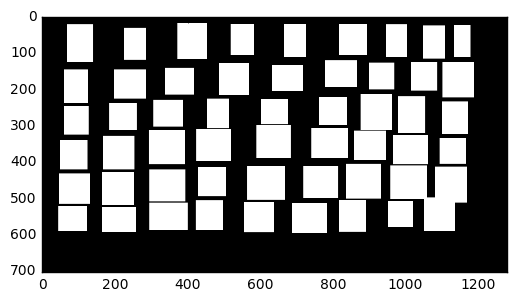


(1, 704, 1280, 1)


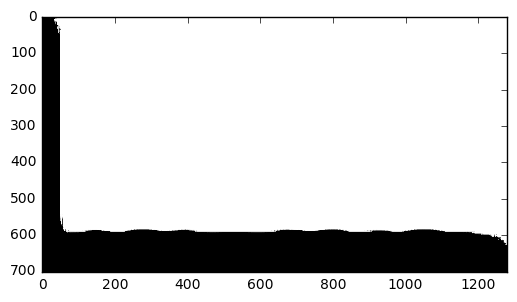

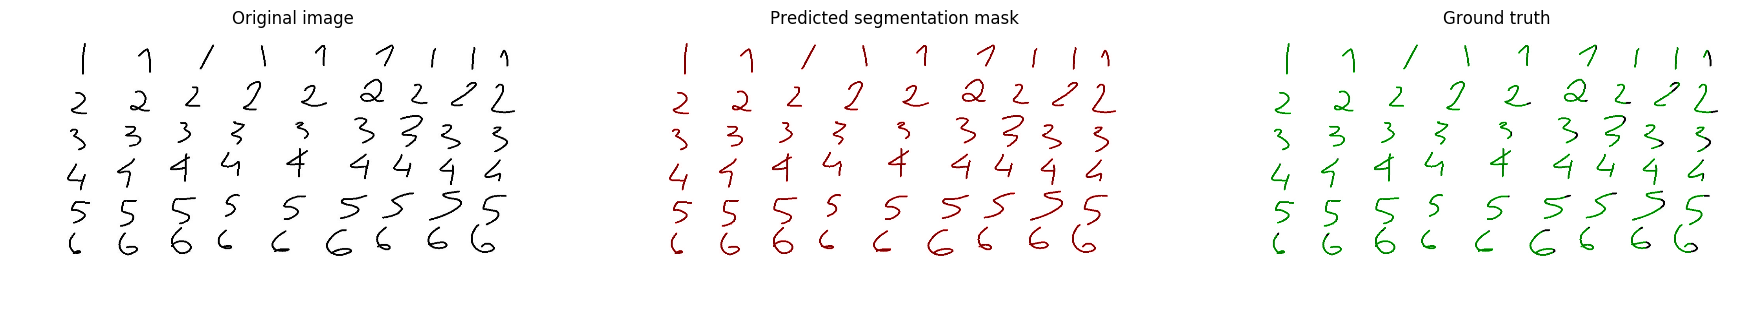

In [27]:
dataInfo = dataFile
row = np.random.randint(len(dataInfo))

fileName = dataInfo['imagename'][row]
img = cv2.imread(fileName)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
origShape = img.shape
img = cv2.resize(img, (imgCol, imgRow))

data = dataInfo[dataInfo['imagename'][row] == dataInfo['imagename']].reset_index()
data['toplefty'] = np.round(data['toplefty'] / origShape[1] * imgCol)
data['bottomrighty'] = np.round(data['bottomrighty'] / origShape[1] * imgCol)
data['topleftx'] = np.round(data['topleftx'] / origShape[0] * imgRow)
data['bottomrightx'] = np.round(data['bottomrightx'] / origShape[0] * imgRow)

targetImg = np.reshape(np.zeros_like(img[:, :, 2]), (imgRow, imgCol, 1))
for i in range(len(data)):
    targetImg[data.iloc[i]['toplefty']:data.iloc[i]['bottomrighty'],data.iloc[i]['topleftx']:data.iloc[i]['bottomrightx'], :] = 1

img11 = cv2.resize(targetImg, (imgCol, imgRow))
plt.imshow(img11,cmap='gray')
plt.show()
print()
xy_array = np.asarray(img)
xy_array = np.reshape(xy_array,(1,img.shape[0],img.shape[1],3))

img = model.predict(xy_array)
mask_array  = np.reshape(targetImg,(1,targetImg.shape[0],targetImg.shape[1],1))


print(img.shape)
img11 = cv2.resize(img[0], (imgCol, imgRow))
plt.imshow(img11,cmap='gray')
plt.show()
print()


im = np.array(xy_array[0],dtype=np.uint8)
im_mask = np.array(255*mask_array[0],dtype=np.uint8)
im_pred = np.array(255*img[0],dtype=np.uint8)

rgb_mask_pred = cv2.cvtColor(im_pred,cv2.COLOR_GRAY2RGB)
rgb_mask_pred[:,:,1:3] = 0*rgb_mask_pred[:,:,1:2]
rgb_mask_true= cv2.cvtColor(im_mask,cv2.COLOR_GRAY2RGB)
rgb_mask_true[:,:,0] = 0*rgb_mask_true[:,:,0]
rgb_mask_true[:,:,2] = 0*rgb_mask_true[:,:,2]

img_pred = cv2.addWeighted(rgb_mask_pred,0.5,im,1,0)
img_true = cv2.addWeighted(rgb_mask_true,0.5,im,1,0)

plt.figure(figsize=(22,16))
plt.subplot(1,3,1)
plt.imshow(im)
plt.title('Original image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(img_pred)
plt.title('Predicted segmentation mask')
plt.axis('off')
plt.subplot(1,3,3)        
plt.imshow(img_true)
plt.title('Ground truth')
plt.axis('off')
plt.show()

    
